# Problem Set 3

# 1) Introduction : Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

# Occupations :


# Step 1 : Import the necessary libraries


In [1]:
import pandas as pd

In [2]:
import numpy as np

# Step 2 : Import the dataset from this address.

Imported and assigned to a variable in the next step.

# Step 3 : Assign it to a variable called users

In [8]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


# Step 4. Discover what is the mean age per occupation

In [12]:
users[["age", "occupation"]].groupby("occupation").mean()


,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


# Step 5. Discover the Male ratio per occupation and sort it from the most to the least


In [17]:
def Occupation_cnt_male(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
    
users['male'] = users['gender'].apply(Occupation_cnt_male)

male_ratio = users.groupby('occupation').male.sum() / users.occupation.value_counts() * 100 

male_ratio.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

# Step 6. For each occupation, calculate the minimum and maximum ages

In [19]:
users.groupby('occupation').age.agg(['max', 'min'])


,max,min
occupation,,
administrator,70,21
artist,48,19
doctor,64,28
educator,63,23
engineer,70,22
entertainment,50,15
executive,69,22
healthcare,62,22
homemaker,50,20


# Step 7. For each combination of occupation and sex, calculate the mean age


In [20]:
users.groupby(['occupation', 'gender']).age.mean()


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

# Step 8. For each occupation present the percentage of women and men


# Question 2 : EURO TEAMS

# Step 1. Import the necessary libraries


In [27]:
import numpy as np
import pandas as pd

# Step 2. Import the dataset from this address


  Imported and assigned to a variable in the next step.

# Step 3. Assign it to a variable called euro12


In [29]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


# Step 4. Select only the Goal column


In [30]:
euro12['Goals']


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

# Step 5. How many team participated in the Euro2012?


In [32]:
Team_cnt = euro12['Team'].count()
print("Total teams participated in the EURO2012 : ", Team_cnt)

Total teams participated in the EURO2012 :  16


# Step 6. What is the number of columns in the dataset?


In [36]:
NumOfColumns= len(euro12.axes[1])
print("Total number of Columns in the dataset are",NumOfColumns)

Total number of Columns in the dataset are 35


# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline


In [43]:
discipline  = pd.DataFrame(euro12, columns = ['Team', 'Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


# Step 8. Sort the teams by Red Cards, then to Yellow Cards


In [41]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


# Step 9. Calculate the mean Yellow Cards given per Team


In [45]:
YellowCards = discipline['Yellow Cards'].mean()
print("Mean of Yellow Cards given per Team :", YellowCards)

Mean of Yellow Cards given per Team : 7.4375


# Step 10. Filter teams that scored more than 6 goals


In [46]:
Goals_gt6 = euro12['Goals'] > 6
euro12[Goals_gt6]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


# Step 11. Select the teams that start with G


In [49]:
euro12[euro12.Team.str.startswith('G')]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


# Step 12. Select the first 7 columns


In [50]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


# Step 13. Select all columns except the last 3


In [52]:
euro12.loc[:, euro12.columns != -3]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


# Step 14. Present only the Shooting Accuracy from England, Italy and Russia


In [53]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3 : HOUSING

# Step 1. Import the necessary libraries

In [54]:
import pandas as pd
import numpy as np
import random

# Step 2. Create 3 differents Series, each of length 100, as follows:


Series of random number from 1 to 4

In [65]:
RanSeries1= pd.DataFrame([np.random.randint(1,4) for i in range(100)])
RanSeries1


,0
0,1
1,2
2,3
3,2
4,3
...,...
95,2
96,1
97,3
98,3


Series of random number from 1 to 3

In [66]:
RanSeries2= pd.DataFrame([np.random.randint(1,3) for i in range(100)])
RanSeries2

,0
0,2
1,1
2,1
3,2
4,1
...,...
95,1
96,2
97,1
98,1


Series of random number from 10,000 to 30,000

In [67]:
RanSeries3= pd.DataFrame([np.random.randint(10000,30000) for i in range(100)])
RanSeries3

,0
0,28154
1,12795
2,27347
3,13420
4,10979
...,...
95,10297
96,20806
97,19791
98,21552


# Step 3. Create a DataFrame by joinning the Series by column


In [70]:
DataFrameMix = pd.concat([RanSeries1, RanSeries2, RanSeries3], axis=1)
DataFrameMix

,0,0,0
0,1,2,28154
1,2,1,12795
2,3,1,27347
3,2,2,13420
4,3,1,10979
...,...,...,...
95,2,1,10297
96,1,2,20806
97,3,1,19791
98,3,1,21552


# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter


In [72]:
DataFrameMix.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
DataFrameMix

,bedrs,bathrs,price_sqr_meter
0,1,2,28154
1,2,1,12795
2,3,1,27347
3,2,2,13420
4,3,1,10979
...,...,...,...
95,2,1,10297
96,1,2,20806
97,3,1,19791
98,3,1,21552


# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'


In [78]:
DataFrameBig = pd.concat([RanSeries1, RanSeries2, RanSeries3])
DataFrameBig.columns = ['bigcolumn']
DataFrameBig


,bigcolumn
0,1
1,2
2,3
3,2
4,3
...,...
95,10297
96,20806
97,19791
98,21552


# Step 6. Ops it seems it is going only until index 99. Is it true?


Yes, it is going till index 99.

# Step 7. Reindex the DataFrame so it goes from 0 to 299


In [83]:
DataFrameBig.reindex(index=range(0,299))


ValueError: cannot reindex from a duplicate axis

# Question 5


# Step 1. Import the necessary libraries


In [84]:
import pandas as pd
import numpy as np

# Step 2. Import the dataset from this address.


Dataset imported and assigned to a variable in the next step.

# Step 3. Assign it to a variable called chipo.


In [85]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


# Step 4. See the first 10 entries


In [86]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# Step 5. What is the number of observations in the dataset?


In [88]:
Total_Observations = chipo.shape[0]
print("Total number of observations in the dataset chipo are :",Total_Observations)

Total number of observations in the dataset chipo are : 4622


# Step 6. What is the number of columns in the dataset?


In [90]:
columns = len(chipo.axes[1])
print("Total number of columns in the dataset chipo is :", columns)


Total number of columns in the dataset chipo is : 5


# Step 7. Print the name of all the columns.


In [93]:
for ColumnName in chipo.columns: 
    print(ColumnName)

order_id
quantity
item_name
choice_description
item_price


# Step 8. How is the dataset indexed?


In [94]:
chipo.index


RangeIndex(start=0, stop=4622, step=1)

# Step 9. Which was the most-ordered item?


The item Chicken Bowl having order_id 713926 was the most ordered item as it has the maximum quantity that is 761. 

In [104]:
chipo.groupby("item_name").sum().sort_values('quantity',ascending=False)


,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351
Chips,208004,230
Steak Bowl,193752,221
Bottled Water,175944,211
Chips and Fresh Tomato Salsa,100419,130


# Step 10. For the most-ordered item, how many items were ordered?


In [105]:
chipo.groupby("item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


For the most ordered item that is chicken bowl, total 761 items were ordered.

# Step 11. What was the most ordered item in the choice_description column?


In [106]:
chipo.groupby("choice_description").sum().sort_values('quantity',ascending=False).head(1)


,order_id,quantity
choice_description,,
[Diet Coke],123455,159


# Step 12. How many items were orderd in total?


In [107]:
chipo.item_name.count()


4622

# Step 13

1) Turn the item price into a float


In [138]:
chipo['item_price'] = chipo['item_price'].astype(float)
chipo


,order_id,quantity,item_name,choice_description,item_price,Revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


2) Check the item price type



In [139]:
chipo.item_price.dtype

dtype('float64')

# Step 14. How much was the revenue for the period in the dataset?


In [115]:
Revenue =  (chipo.item_price * chipo.quantity).sum()
Revenue

39237.02

# Step 15. How many orders were made in the period?


In [116]:
chipo.order_id.value_counts().count()


1834

# Step 16. What is the average revenue amount per order?


In [121]:
chipo['Revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped= chipo.groupby('order_id').sum().mean()
order_grouped

quantity       2.711014
item_price    18.811429
Revenue       21.394231
dtype: float64

Average revenue amount is 21.4 per order

# Step 17. How many different items are sold?


In [122]:
chipo.item_name.value_counts().count()


50

# Question 6 : Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!


In [140]:
import pandas as pd
US_mrg = pd.read_csv(r'C:\Users\rkpat\us-marriages-divorces-1867-2014.csv')
US_mrg.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


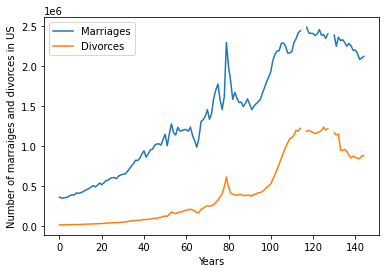

In [159]:
import matplotlib.pyplot as plt

US_mrg.plot.line(y=['Marriages', 'Divorces'])
plt.xlabel("Years")
plt.ylabel("Number of marraiges and divorces in US")
plt.show()

# Question 7


Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!



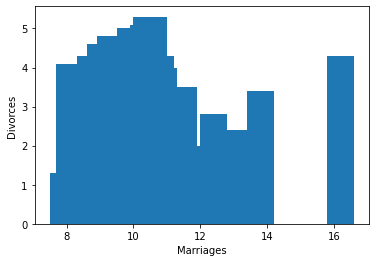

In [198]:
import matplotlib.pyplot as plt

US_mrg2= US_mrg[(US_mrg['Year']>=1900) & (US_mrg['Year']<2000)]
plt.bar(US_mrg2['Marriages_per_1000'],US_mrg2['Divorces_per_1000'])

plt.xlabel('Marriages')
plt.ylabel('Divorces')
plt.show()

# Question 8


Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
DeadliestActor= pd.read_csv(r'C:\Users\rkpat\Downloads\actor_kill_counts.csv')
DeadliestActor.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


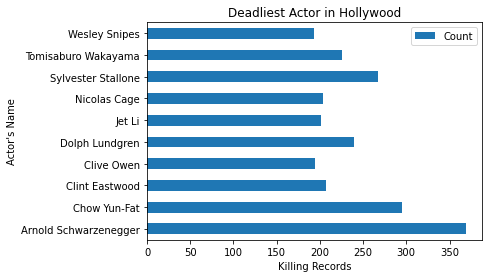

In [193]:
DeadliestActor.plot.barh(x='Actor',y='Count');

plt.title("Deadliest Actor in Hollywood")
plt.ylabel("Actor's Name")
plt.xlabel("Killing Records")

plt.show()

# Question 9


Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
RomanEmp = pd.read_csv(r'C:\Users\rkpat\Downloads\roman-emperor-reigns.csv')
RomanEmp.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


# Question 10


Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
Revenue= pd.read_csv(r'C:\Users\rkpat\Downloads\arcade-revenue-vs-cs-doctorates.csv')
Revenue.head()


,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


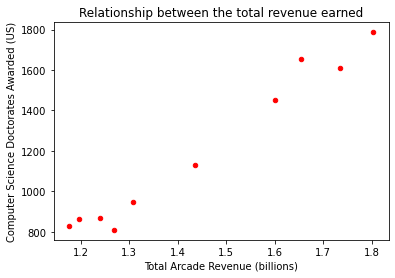

In [188]:
Revenue.plot.scatter(x = 'Total Arcade Revenue (billions)', y = 'Computer Science Doctorates Awarded (US)', c = 'red');

plt.title("Relationship between the total revenue earned")
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")
plt.show()
